# Predicting Student Dropouts || Investigating the Impact of Social and Economic Factors

## Introduction

Students' academic success may be strongly influenced by the intricate interaction of their social and economic circumstances, prompting questions regarding how these elements may affect educational results. In order to identify prospective areas for intervention and policy development in higher educational institutions.

## Objective

This project aims to create machine learning models that is able to detect potential dropouts ahead of time. As well as identify important features that impacts whether a student drops out or not.


## Pre-Analysis

* Import Libraries
* Load in Data

In [1]:
## Data Manipulation
import pandas as pd
import numpy as np
import scipy.stats as stats

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)


# Data Visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

# SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter

# sklearn
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import cross_val_score

In [2]:
# Load in Data
df = pd.read_csv('dataset.csv')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,10,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,4,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,10,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,4,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,10,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Basic Data Exploration

1. Explore the features of the data (size, columns, etc.)
2. Look for Null and duplicated values
3. Perform data cleaning (if needed)

In [3]:
# Column names (useful to ensure no misspelling during data manipulation)
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [4]:
# shape of data
df.shape

(4424, 35)

In [5]:
# structure of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [6]:
# Number of Unique values in a column
df.nunique()

Marital status                                      6
Application mode                                   18
Application order                                   8
Course                                             17
Daytime/evening attendance                          2
Previous qualification                             17
Nacionality                                        21
Mother's qualification                             29
Father's qualification                             34
Mother's occupation                                32
Father's occupation                                46
Displaced                                           2
Educational special needs                           2
Debtor                                              2
Tuition fees up to date                             2
Gender                                              2
Scholarship holder                                  2
Age at enrollment                                  46
International               

In [7]:
# check for null values
df.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [8]:
# check for duplicates
df.duplicated().sum()

0

Good news! There are no NAs or Duplicated rows. And the categorical features have already been pre-processed

## Data Pre-processing

We will be removing the following unwanted columns (We will only keep the Social and economic variables),

* We will drop the highly correlated variables (to avoid multicolinearity)

| Feature                                | Collinearity with                      | Pearson |
|----------------------------------------|----------------------------------------|---------|
| Curricular units 1st sem (credited)    | Curricular units 2nd sem (credited)    | 0.9448  |
|                                        | Curricular units 1st sem (enrolled)    | 0.7743  |
| Curricular units 1st sem (enrolled)    | Curricular units 2nd sem (enrolled)    | 0.9426  |
|                                        | Curricular units 1st sem (approved)    | 0.7691  |
|                                        | Curricular units 2nd sem (credited)    | 0.7537  |
| Nationality                            | International                          | 0.9117  |
| Curricular units 1st sem (approved)    | Curricular units 2nd sem (approved)    | 0.9040  |
|                                        | Curricular units 2nd sem (enrolled)    | 0.7338  |
| Curricular units 1st sem (grade)       | Curricular units 2nd sem (grade)       | 0.8372  |
| Curricular units 1st sem (evaluations) | Curricular units 2nd sem (evaluations) | 0.7789  |
| Curricular units 2nd sem (approved)    | Curricular units 2nd sem (grade)       | 0.7608  |
| Mother’s occupation                    | Father’s occupation                    | 0.7240  |
| Curricular units 2nd sem (enrolled)    | Curricular units 2nd sem (approved)    | 0.7033  |

Table was generated by the authors of the [authors](https://www.mdpi.com/2306-5729/7/11/146)

* We will drop application mode (unable to understand what this is)

In [9]:
# Remove unwanted
df1 = df.drop(['Application mode', 'Nacionality',
       "Father's occupation",
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (without evaluations)', 
       'Curricular units 2nd sem (grade)',
       'Unemployment rate',
       'Inflation rate', 'GDP'], axis = 1)
df1.columns

Index(['Marital status', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Displaced', 'Educational special needs',
       'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (grade)', 'Target'],
      dtype='object')

In [10]:
# Distribution of Target
Target = df1['Target'].value_counts()
print(Target)
print()
print(df1.Target.value_counts(normalize = True))

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

Graduate    0.499322
Dropout     0.321203
Enrolled    0.179476
Name: Target, dtype: float64


In [11]:
# Plot Bar Chat to Visualise Target
fig = px.bar(x = Target.index, y = Target.values, title = 'Distribution of Target', color = Target.index, text = df1.Target.value_counts(normalize = True)*100)
fig.update_traces(texttemplate = '%{text:,.0f}%')
fig.update_yaxes(title = 'Count')
fig.update_xaxes(title = 'Target')
fig.show()

As mentioned in the article written by the [authors](https://www.mdpi.com/2306-5729/7/11/146), the problem was formulated as a three-category classification task, in which there is a strong imbalance towards one of the classes. As seen in the bar plot above, we can see that the majority class 'Graduate' represents 50% of the records (2209 of 4424) and Dropout represents 32% of total records (1421 of 4424), while the minority class, Enrolled, represents 18% of total records (794 of 4424). This might result in a high prediction accuracy driven by the majority class at the expense of a poor performance of the minority class.

### SMOTE

SMOTE (Synthetic Minority Over-sampling Technique) is a technique used to address the class imbalance problem in machine learning, specifically in the context of binary classification. It works by generating synthetic samples for the minority class to balance the class distribution. The objective is to create new instances that are similar to existing minority class instances while avoiding overfitting.

There are 3 categories in 'Target':
* Dropout = 0
* Enrolled = 1
* Graduate = 2

In [12]:
df1['Target'] = df1['Target'].map({
    'Dropout':0,
    'Enrolled':1,
    'Graduate':2
})
df1['Target'].unique()

array([0, 2, 1])

In [13]:
# Split the data into training and testing sets (80% Training, 20% Test)
X = df1.drop('Target', axis=1)
y = df1['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Count the class distribution before applying SMOTE
print("Class distribution before oversampling:", Counter(y))

# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_oversampled, y_oversampled = smote.fit_resample(X, y)

# Count the class distribution after applying SMOTE
print("Class distribution after oversampling:", Counter(y_oversampled))

Class distribution before oversampling: Counter({2: 2209, 0: 1421, 1: 794})
Class distribution after oversampling: Counter({0: 2209, 2: 2209, 1: 2209})


In [15]:
X_train_oversampled , X_test_oversampled, y_train_oversampled, y_test_oversampled = train_test_split(X_oversampled, y_oversampled, test_size=0.2, random_state=42)

## Training the Models

* baseline

#### Naive Bayes

In [16]:
# Naive bayes
gnb = GaussianNB()
cv = cross_val_score(gnb, X_train_oversampled, y_train_oversampled, cv = 5)
print(cv.mean())

0.6095074066829087


#### logistic Regression

In [17]:
# Logistic Regression
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr, X_train_oversampled, y_train_oversampled, cv = 5)
print(cv.mean())

0.653463268899045


#### Decision Trees

In [18]:
# Decision Trees
dt = tree.DecisionTreeClassifier(random_state = 42)
cv = cross_val_score(dt, X_train_oversampled, y_train_oversampled, cv = 5)
print(cv.mean())

0.638558675510821


### K Nearest Neighbour

In [19]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn, X_train_oversampled, y_train_oversampled, cv = 5)
print(cv.mean())

0.6464817811605285


#### Random Forest

In [20]:
# Random Forest
rf = RandomForestClassifier(random_state = 42)
cv = cross_val_score(rf, X_train_oversampled, y_train_oversampled, cv = 5)
print(cv.mean())

0.7449554532036349


### SVC

In [21]:
# SVC
svc = SVC(probability = True)
cv = cross_val_score(svc, X_train_oversampled, y_train_oversampled, cv = 5)
print(cv.mean())

0.6006446392687568


#### XGboost

In [22]:
xgb = XGBClassifier(random_state =1)
cv = cross_val_score(xgb, X_train_oversampled, y_train_oversampled, cv = 5)
print(cv.mean())

0.7287311720875641


#### Voting Classifier

In [23]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',lr),('knn',knn),('rf',rf),('gnb',gnb),('svc',svc),('xgb',xgb)], voting = 'soft') 

In [24]:
cv = cross_val_score(voting_clf, X_train_oversampled, y_train_oversampled, cv = 5)
print(cv.mean())

0.7217509291697046


In [25]:
voting_clf.fit(X_train_oversampled, y_train_oversampled)

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=2000)),
                             ('knn', KNeighborsClassifier()),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('gnb', GaussianNB()),
                             ('svc', SVC(probability=True)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_roun...
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                   

In [26]:
y_pred = voting_clf.predict(X_test_oversampled)
print("Accuracy:", accuracy_score(y_test_oversampled, y_pred))
print("Precision:", precision_score(y_test_oversampled, y_pred, average='micro'))
print("Recall:", recall_score(y_test_oversampled, y_pred, average='micro'))
print("F1 Score:", f1_score(y_test_oversampled, y_pred, average='micro'))

Accuracy: 0.7307692307692307
Precision: 0.7307692307692307
Recall: 0.7307692307692307
F1 Score: 0.7307692307692306


Text(0.5, 1.0, 'Confusion Matrix')

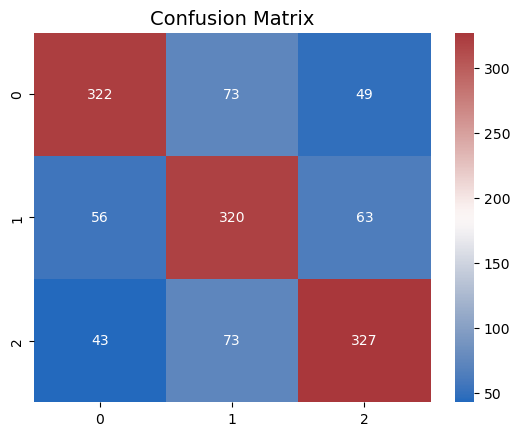

In [27]:
cf = confusion_matrix(y_test_oversampled, y_pred)
sns.heatmap(cf, annot=True, cmap=sns.color_palette("vlag", as_cmap=True), fmt=".0f")
plt.title("Confusion Matrix", fontsize=14)

### Optimising Random Forest

In [29]:
#simple performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))


In [33]:
rf = RandomForestClassifier(random_state = 42)
param_grid =  {'n_estimators': [100,500,1000], 
                                  'bootstrap': [True,False],
                                  'max_depth': [3,5,10,20,50,75,100,None],
                                  'max_features': ['auto','sqrt'],
                                  'min_samples_leaf': [1,2,4,10],
                                  'min_samples_split': [2,5,10]}
                                  
clf_rf = RandomizedSearchCV(rf, param_distributions = param_grid, n_iter = 100, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_train_oversampled, y_train_oversampled)
clf_performance(best_clf_rf, 'Random Forest')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Random Forest
Best Score: 0.7466530329166148
Best Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}


In [34]:
y_pred = best_clf_rf.predict(X_test_oversampled)
print("Accuracy:", accuracy_score(y_test_oversampled, y_pred))
print("Precision:", precision_score(y_test_oversampled, y_pred, average='micro'))
print("Recall:", recall_score(y_test_oversampled, y_pred, average='micro'))
print("F1 Score:", f1_score(y_test_oversampled, y_pred, average='micro'))

Accuracy: 0.7616892911010558
Precision: 0.7616892911010558
Recall: 0.7616892911010558
F1 Score: 0.7616892911010559


Text(0.5, 1.0, 'Confusion Matrix')

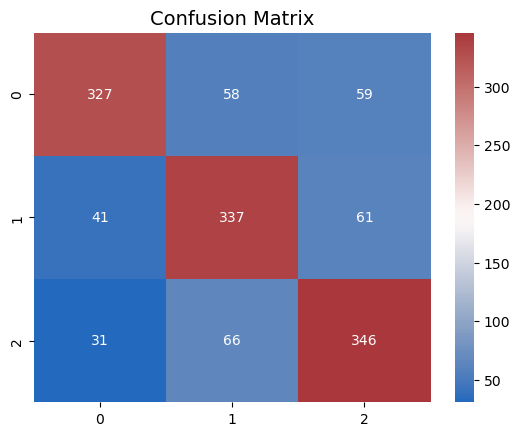

In [35]:
cf = confusion_matrix(y_test_oversampled, y_pred)
sns.heatmap(cf, annot=True, cmap=sns.color_palette("vlag", as_cmap=True), fmt=".0f")
plt.title("Confusion Matrix", fontsize=14)

<AxesSubplot:>

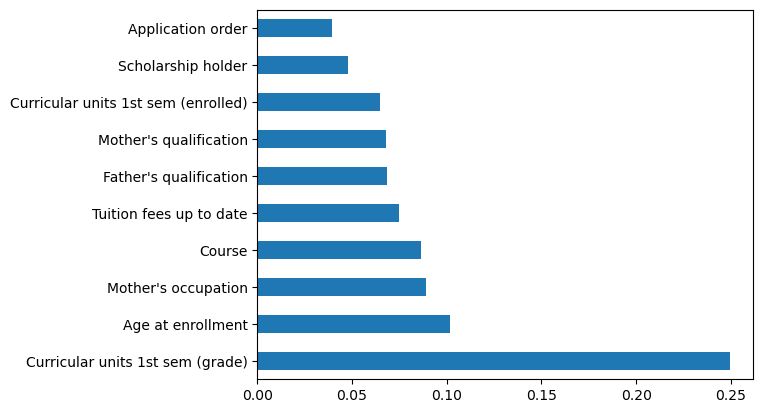

In [36]:
best_rf = best_clf_rf.best_estimator_.fit(X_train_oversampled, y_train_oversampled)
feat_importances = pd.Series(best_rf.feature_importances_, index=X_train_oversampled.columns)
feat_importances.nlargest(10).plot(kind='barh')

Grade is by far the most important feature in determining student dropouts.